# Install 
installing such libraries

To extract sentiments from Donald Trump's tweets it is necessary to use the Lexico-based sentiment analysis tool called VADER which was introduced in 2014 to deal with social media texts (I. Awajan et al. 2021) this model uses the combination of lexicals able to label sentences as positive, negative, or neutral. This technique is quite popular as it works very well with social media texts, no training data is needed as it is built from a generalized feeling lexicon, fast enough to be used online with uncompensated streaming data between speed and performance, it detects feelings of slang, in addition to being an open source, (E. Saad et al, 2021) several authors used VADER in the studies and found that this technique has the performance similar to that of human evaluators.

In [1]:
#installing vaderSentiment
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 4.1 MB/s 


In [2]:
!pip install numpy pandas

# **Import**
Importing all the libraries That I need for my analysis

In [3]:
import numpy as np
import pandas as pd # data processing, CSV file
import re # data preparation, cleaning data
import string

# **Getting the Data**

In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
# Importing dataset and examining it

dataset = pd.read_csv("/content/drive/My Drive/bd/tweets_01-08-2021.csv", encoding="latin-1")

# **Understanding the database**

---



In [6]:
# Checking rows and columns
print(dataset.head())

                    id  ... isFlagged
0    98454970654916608  ...         f
1  1234653427789070336  ...         f
2  1218010753434820614  ...         f
3  1304875170860015617  ...         f
4  1218159531554897920  ...         f

[5 rows x 9 columns]


In [7]:
#Checking details of the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56571 entries, 0 to 56570
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         56571 non-null  int64 
 1   text       56571 non-null  object
 2   isRetweet  56571 non-null  object
 3   isDeleted  56571 non-null  object
 4   device     56571 non-null  object
 5   favorites  56571 non-null  int64 
 6   retweets   56571 non-null  int64 
 7   date       56571 non-null  object
 8   isFlagged  56571 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.9+ MB
None


In [8]:
dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,56571,NaN,NaN,NaN,7.98787e+17,3.82662e+17,1.69831e+09,4.60619e+17,7.47102e+17,1.19313e+18,1.34757e+18
text,56571,56118,MAKE AMERICA GREAT AGAIN!,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isRetweet,56571,2,f,46694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isDeleted,56571,2,f,55479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device,56571,20,Twitter for iPhone,27967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorites,56571,NaN,NaN,NaN,28349.6,57815.6,0,10,164,43938.5,1.86971e+06
retweets,56571,NaN,NaN,NaN,8618.99,13306.1,0,59,3450,13014.5,408866
date,56571,56022,2020-10-25 19:18:16,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isFlagged,56571,2,f,56267,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CHECKING DUPLICATED IDS

In [9]:
print('Value Counts: {}'.format(dataset['id'].value_counts().sum()))
print('Number of Entries: {}'.format(dataset.shape[0]))

Value Counts: 56571
Number of Entries: 56571


In [10]:
#checking missing value
dataset.isnull().sum()

id           0
text         0
isRetweet    0
isDeleted    0
device       0
favorites    0
retweets     0
date         0
isFlagged    0
dtype: int64

In [11]:

print (dataset.describe())

                 id     favorites       retweets
count  5.657100e+04  5.657100e+04   56571.000000
mean   7.987865e+17  2.834955e+04    8618.987467
std    3.826616e+17  5.781564e+04   13306.132408
min    1.698309e+09  0.000000e+00       0.000000
25%    4.606192e+17  1.000000e+01      59.000000
50%    7.471024e+17  1.640000e+02    3450.000000
75%    1.193134e+18  4.393850e+04   13014.500000
max    1.347570e+18  1.869706e+06  408866.000000


In [12]:
dataset.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f


In [13]:
#Checking if there is repeated ID, if there is I should delete
dataset['id'].value_counts()

423197613765050368     1
1342243632833814528    1
112244047195803648     1
673564787830341634     1
1188048255797608449    1
                      ..
489433006541910016     1
1226123356526825472    1
261842867000078337     1
1222006774368296960    1
522558305441693696     1
Name: id, Length: 56571, dtype: int64

In [14]:
#checking the dataset shape
print(dataset.shape)

(56571, 9)


In [15]:
#Using only the column that I need
data = dataset[["text","favorites","retweets","date"]]

In [16]:
data.head

<bound method NDFrame.head of                                                     text  ...                 date
0      Republicans and Democrats have both created ou...  ...  2011-08-02 18:07:48
1      I was thrilled to be back in the Great city of...  ...  2020-03-03 01:34:50
2      RT @CBS_Herridge: READ: Letter to surveillance...  ...  2020-01-17 03:22:47
3      The Unsolicited Mail In Ballot Scam is a major...  ...  2020-09-12 20:10:58
4      RT @MZHemingway: Very friendly telling of even...  ...  2020-01-17 13:13:59
...                                                  ...  ...                  ...
56566  RT @RandPaul: I donât know why @JoeBiden thi...  ...  2020-10-23 03:46:25
56567  RT @EliseStefanik: President @realDonaldTrump ...  ...  2020-10-23 03:42:05
56568  RT @TeamTrump: LIVE: Presidential Debate #Deba...  ...  2020-10-23 01:03:58
56569  Just signed an order to support the workers of...  ...  2020-10-22 21:04:21
56570  Suburban women want Safety &amp; Security. Joe... 

# **DATA PREPARATION**
• Make all text lowercase;

• Remove links;

• Remove tags;

• Remove breaklines;

• Remove words with numbers inside;

• Remove punctuations;

• Remove accents;

• Remove duplicated whitespaces

In [17]:
import unicodedata

In [18]:
#Filter to remove links
data['text'].iloc[1000]


'Republican Burgess Owens Defeats Democrat Rep. Ben McAdams in Utah https://t.co/H9NlPQj5yb via @BreitbartNews Great going Burgess, you continue to be a STAR!'

In [19]:
re.sub('https?://\S+|www\.\S+', '', data['text'].iloc[1000])

'Republican Burgess Owens Defeats Democrat Rep. Ben McAdams in Utah  via @BreitbartNews Great going Burgess, you continue to be a STAR!'

In [20]:
#Filter to remove tags
re.sub('<.*?>+', ' ', '<h1>TEXT</h1>')


' TEXT '

In [21]:
re.sub('\[.*?\]', '', '[tag]TEXT[--tag]')

'TEXT'

In [22]:
#Filter to remove words with numbers inside
re.sub('\w*\d\w*', ' ', 'sea3sky blue today')

'  blue today'

In [23]:
#Filter to remove duplicate whitespaces
re.sub(r'\s+', ' ', 'A B C              D')

'A B C D'

In [24]:
#Filter to remove punctuation
data['text'].iloc[60]

'Polls numbers are looking very strong. Big crowds, great enthusiasm. Massive RED WAVE coming!!!'

In [25]:
re.sub(r'[^\w\s]', '', data['text'].iloc[60])

'Polls numbers are looking very strong Big crowds great enthusiasm Massive RED WAVE coming'

In [26]:
#Filter to remove accents
data['text'].iloc[1002]

'The â\x80\x9closers &amp; suckersâ\x80\x9d statement on dead military heroes has been proven to be a total fabrication and lie. IT WAS NEVER MADE! The â\x80\x9canonymousâ\x80\x9d fabricator, who is a major sleaze, went forward with the lie despite 25 strong witnesses to the contrary. Welcome to the roaring 20â\x80\x99s!'

In [27]:
text = data['text'].iloc[1002]
text = unicodedata.normalize('NFKD', text)
text = "".join([c for c in text if not unicodedata.combining(c)])
print(text)

The alosers &amp; suckersa statement on dead military heroes has been proven to be a total fabrication and lie. IT WAS NEVER MADE! The aanonymousa fabricator, who is a major sleaze, went forward with the lie despite 25 strong witnesses to the contrary. Welcome to the roaring 20as!


In [29]:
#checking how the tweets are know, If it is clean or not
data['text']

0        republicans and democrats have both created ou...
1        i was thrilled to be back in the great city of...
2        rt cbsherridge read letter to surveillance cou...
3        the unsolicited mail in ballot scam is a major...
4        rt mzhemingway very friendly telling of events...
                               ...                        
56566    rt randpaul i donat know why joebiden thinks...
56567    rt elisestefanik president realdonaldtrump exc...
56568       rt teamtrump live presidential debate vote to 
56569    just signed an order to support the workers of...
56570    suburban women want safety amp security joe bi...
Name: text, Length: 56571, dtype: object

In [30]:
# Checking the tweets from 100 to 115 using ILOC to select the rows
data['text'].iloc[100:115]

100    foxnews quinnipiacpoll abcwapo nbcwsj were so ...
101                    rt dbongino this ðð»ðð»
102    pleased to announce that kloeffler amp sendavi...
103    if joe biden were president you wouldnat hav...
104    the usfda and the democrats didnat want to h...
105    who will be running for governor of the great ...
106    another vaccine just announced this time by mo...
107    rt realdonaldtrump john bolton was one of the ...
108    rt rudygiuliani the only thing that would have...
109    rt rudygiuliani i imagine this guy has a readi...
110    rt andrewpollackfl would you ever hear biden s...
111    rt andrewpollackfl the million maga march happ...
112    the fake recount going on in georgia means not...
113                             rt dbongino amen to that
114    georgia get out and vote for two great senator...
Name: text, dtype: object

# **Vader Sentiment **



In [31]:
# Using VaderSentiment to define tweet's score, know what should be positive, negative and neutral. 
#Used polarity_scores() method to get the sentiment metrics for a piece of text.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(data['text'])):
    
    score = analyser.polarity_scores(data['text'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data['sentiment']=pd.Series(np.array(sentiment))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
#Checking which tweets are positive negative and neutral
data.head()

,text,favorites,retweets,date,sentiment
0,republicans and democrats have both created ou...,49,255,2011-08-02 18:07:48,Negative
1,i was thrilled to be back in the great city of...,73748,17404,2020-03-03 01:34:50,Positive
2,rt cbsherridge read letter to surveillance cou...,0,7396,2020-01-17 03:22:47,Neutral
3,the unsolicited mail in ballot scam is a major...,80527,23502,2020-09-12 20:10:58,Negative
4,rt mzhemingway very friendly telling of events...,0,9081,2020-01-17 13:13:59,Positive


In [33]:
#Grouping sentiment as POSITIVE, NEGATIVE AND NEUTRAL and counting how many tweets there are per group
temp = data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
2,Positive,30533
0,Negative,14455
1,Neutral,11583


In [34]:
#Plotly is a Python library that is used to generate graphs, rather than that it allows us to view these graphs interactively.
!pip install plotly

In [35]:
#Python Matplotlib is a Python programming language library used for data visualization and graphical plotting.
!pip install matplotlib seaborn

## **Number of favorites and retweets by year**

In [36]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

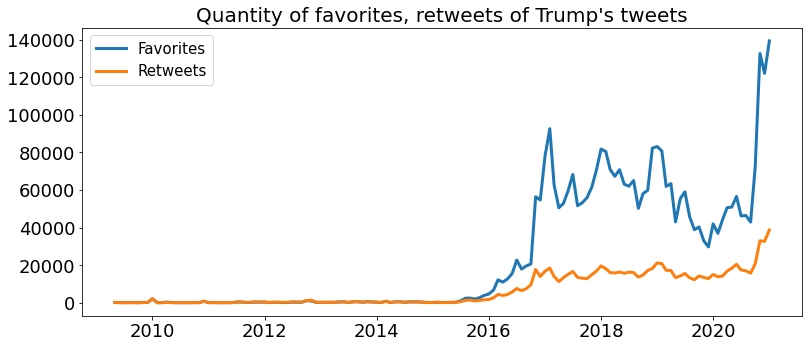

In [37]:
data["date"] = pd.to_datetime(data["date"]) 
data["date"].apply(lambda x: x.year) # getting all years 

# Number of tweets by year
colors = []
for i in range(2020-2009+1):
    x = 0.7-0.06*i
    c = (x,x,0.5)
    colors.append(c)
    
# Creating the visualization
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Quantity of favorites, retweets of Trump's tweets", fontsize=20)
ax.tick_params(labelsize=10)

# Number of tweets (more details)
data["year_month"] = data["date"].apply(lambda x: str(x.year)+"-"+str(x.month))
data["year_month"] = pd.to_datetime(data["year_month"])
year_month = pd.pivot_table(data, values = "text", index = "year_month", aggfunc = "count")

# Average number of "favorites"
year_month = pd.pivot_table(data, values = "favorites", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 3)

# Average number of "retweets"
year_month = pd.pivot_table(data, values = "retweets", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 3)


ax.legend(["Favorites","Retweets"], fontsize=15)
ax.tick_params(labelsize=18)
plt.show()


### **Mean positivity/negativity/neutrality of Trump's tweets by year**

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path whil

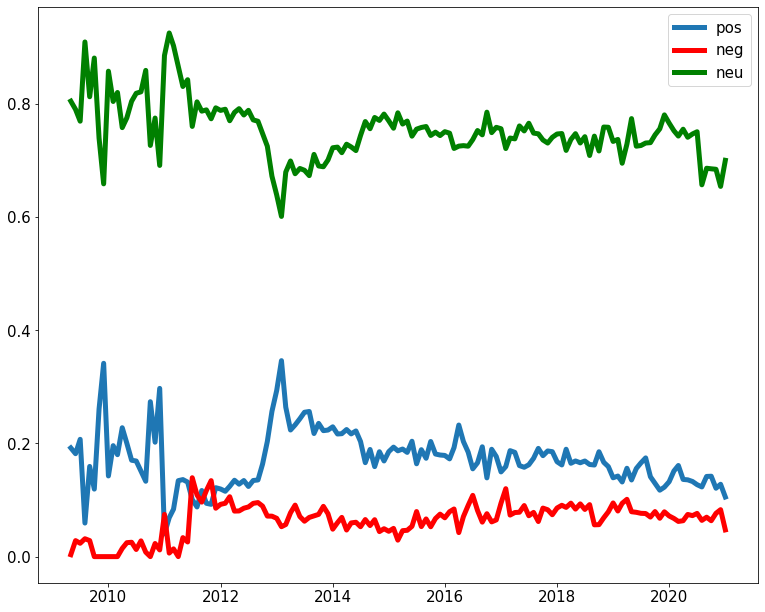

In [38]:
# Calculate the polarity of the tweets of Trump with NLTK
#giving a polarity to the text positives, negative and neutral using the function  .APPLY 
#because it has good performance when to the same tinha many times
#Then I created a vizualization aggfunc function to give the mean to the sentiment
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data["polarity"] = data["text"].apply(lambda x: analyser.polarity_scores(x))

data["pos"] = data["polarity"].apply(lambda x: x["pos"])
data["neg"] = data["polarity"].apply(lambda x: x["neg"])
data["neu"] = data["polarity"].apply(lambda x: x["neu"])
data["compound"] = data["polarity"].apply(lambda x: x["compound"])

# Creating a visualization
ax.set_title("Mean positivity/negativity/neutrality of Trump's tweets by year", fontsize=20)
fig = plt.figure(figsize = (10,8))#size of image
ax = fig.add_axes([0,0,1,1])
ax.tick_params(labelsize=10)

# Positive plot
year_month = pd.pivot_table(data, values = "pos", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5)

# Negative plot
year_month = pd.pivot_table(data, values = "neg", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5, color = "red")

# Neutral plot
year_month = pd.pivot_table(data, values = "neu", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5, color = "green")


ax.legend(["pos","neg","neu"], fontsize=15)
ax.tick_params(labelsize=15)

plt.show()


# Positivity/negativity/neutrality composites of Trump's tweets by year

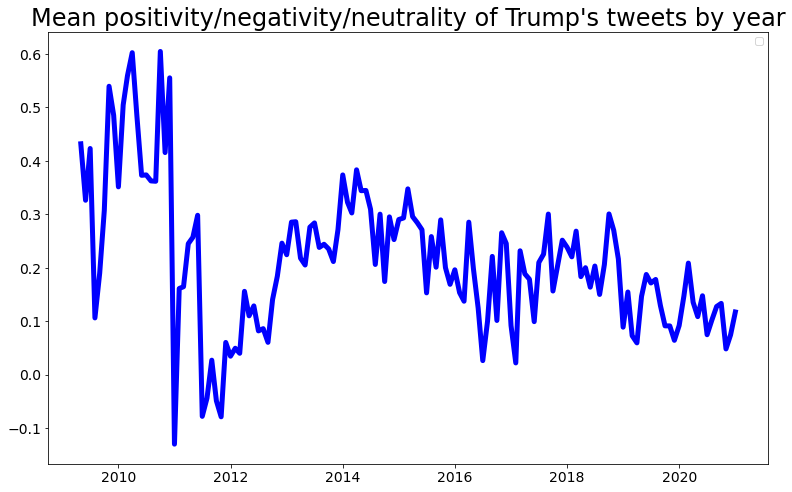

In [39]:
# Create the visualization
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Mean positivity/negativity/neutrality of Trump's tweets by year", fontsize=24)
ax.tick_params(labelsize=14)

# Compound plot
data["year_month"] = data["date"].apply(lambda x: str(x.year)+"-"+str(x.month))
data["year_month"] = pd.to_datetime(data["year_month"])
year_month = pd.pivot_table(data, values = "compound", index = "year_month", aggfunc = "mean")
ax.plot(year_month, lw = 5, color = "blue")


ax.legend(["pos","neg","neu"], fontsize=18)

plt.legend("")
plt.show()

# **Correlation between retweets, favorites and positivity**

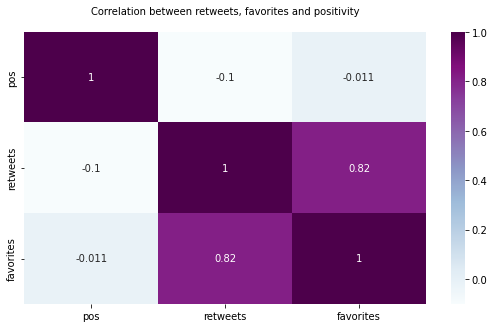

In [40]:
# to know if his positives tweets influence the quantity of retweets/favorites need to 
#Look at the number of favorites and retweets is the way to know if people are interested in what Donald Trump tweeted.
#to do this I used a graph to show the correlation between retweets, favorites and compound. There is a high correlation 
#between favorites and retweets and low correlation between compound and retweets and favorites
#used function as annot to show the value inside the graph 
#used cmap for colour

import seaborn as sns
plt.figure(figsize = (9,5))
plt.title("Correlation between retweets, favorites and positivity\n", fontsize = 10)
sns.heatmap(data[[ "pos","retweets","favorites"]].corr(), annot = True, cmap="BuPu")
plt.show()

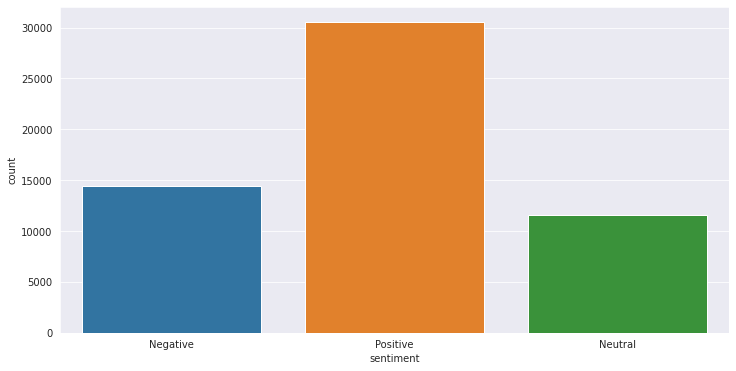

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
import plotly.graph_objs as go
sns.countplot(x='sentiment',data=data)

fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

## Install WordCloud

In [42]:
#library used to display a word cloud
!pip install WordCloud

## Words to ignore

In [43]:
#ignoring the words I don't want to show
to_ignore = ['realdonaldtrump', 'rt']

## WordCloud

(-0.5, 399.5, 199.5, -0.5)

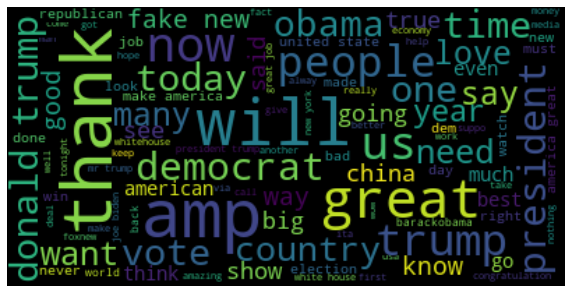

In [44]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re

tweet_All = " ".join(re.sub(r"\b[a-zA-Z]\b", "", review) for review in data.text)
for ig in to_ignore:
    tweet_All = tweet_All.replace(ig, '')


fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

In [45]:
#printing tweets and sentiments
data.head(n=10)

,text,favorites,retweets,date,sentiment,year_month,polarity,pos,neg,neu,compound
0,republicans and democrats have both created ou...,49,255,2011-08-02 18:07:48,Negative,2011-08-01,"{'neg': 0.231, 'neu': 0.598, 'pos': 0.171, 'co...",0.171,0.231,0.598,-0.1779
1,i was thrilled to be back in the great city of...,73748,17404,2020-03-03 01:34:50,Positive,2020-03-01,"{'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'comp...",0.439,0.000,0.561,0.9771
2,rt cbsherridge read letter to surveillance cou...,0,7396,2020-01-17 03:22:47,Neutral,2020-01-01,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
3,the unsolicited mail in ballot scam is a major...,80527,23502,2020-09-12 20:10:58,Negative,2020-09-01,"{'neg': 0.284, 'neu': 0.716, 'pos': 0.0, 'comp...",0.000,0.284,0.716,-0.9552
4,rt mzhemingway very friendly telling of events...,0,9081,2020-01-17 13:13:59,Positive,2020-01-01,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.143,0.000,0.857,0.5413
5,rt whitehouse president realdonaldtrump announ...,0,25048,2020-01-17 00:11:56,Positive,2020-01-01,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",0.246,0.000,0.754,0.5994
6,getting a little exercise this morning,285863,30209,2020-02-01 16:14:02,Neutral,2020-02-01,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
7,,130822,19127,2020-10-23 04:52:14,Neutral,2020-10-01,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000
8,,153446,20275,2020-10-23 04:46:53,Neutral,2020-10-01,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000
9,,102150,14815,2020-10-23 04:46:49,Neutral,2020-10-01,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000


# Histogram of Positive, Negative and Neutral Adjectives

In [46]:
!pip install nltk # installing the NLTK is a leading platform for building Python programs to work with human language data.
import nltk
nltk.download('punkt') #This tokenizer divides a text into a list of sentences
nltk.download('averaged_perceptron_tagger')#is used for tagging words with their parts of speech (POS). We also need to set the add this directory to the NLTK data path.
nltk.download('wordnet')#used for the lemmatization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [47]:
from nltk.stem import PorterStemmer # library to Stemming words
from nltk.tokenize import word_tokenize # library to tokenizing words

## List with all words and remove duplicates

In [48]:
# creating a list of words using the method word_tokenize() to split a sentence into words,
# removing duplicates tweets ( if word not in tweet_words: ) if there is the word will not add again
#then use the method append to create a list for words and show how many hows we have.
tweet_words = []
for word in word_tokenize(tweet_All):
    if word not in tweet_words:
        tweet_words.append(word)
print('Number of words: {}'.format(len(tweet_words)))

Number of words: 50988


In [49]:
#Showing from 0 to 10 tweets 
tweet_words[0:10]

['republicans',
 'and',
 'democrats',
 'have',
 'both',
 'created',
 'our',
 'economic',
 'problems',
 'was']

## Tokenize and separate the adjectives

In [50]:
# separating a piece of text into smaller, separating the adjectives, 
#using pos_tag takes each list of the word, 
#compares it with the database, to know if it is an adjective, verb
#each element of the list becomes a tuple and when is JJ it is adjective
#searches the list for just the word that is JJ and and adds adjective list
#then print the amount of adjectives

words_tags = nltk.pos_tag(tweet_words)
tweet_adj = []
for word_tag in words_tags:
    if word_tag[1] == 'JJ':
        tweet_adj.append(word_tag[0])
        
print('Number of adjectives: {}'.format(len(tweet_adj)))
words_tags

Number of adjectives: 9336


[('republicans', 'NNS'),
 ('and', 'CC'),
 ('democrats', 'NNS'),
 ('have', 'VBP'),
 ('both', 'DT'),
 ('created', 'VBN'),
 ('our', 'PRP$'),
 ('economic', 'JJ'),
 ('problems', 'NNS'),
 ('was', 'VBD'),
 ('thrilled', 'VBN'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('back', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('great', 'JJ'),
 ('city', 'NN'),
 ('of', 'IN'),
 ('charlotte', 'NN'),
 ('noh', 'NNS'),
 ('carolina', 'VBP'),
 ('with', 'IN'),
 ('thousands', 'NNS'),
 ('hardworking', 'VBG'),
 ('american', 'JJ'),
 ('patriots', 'NNS'),
 ('who', 'WP'),
 ('love', 'VBP'),
 ('country', 'NN'),
 ('cherish', 'JJ'),
 ('values', 'NNS'),
 ('respect', 'VBP'),
 ('laws', 'NNS'),
 ('always', 'RB'),
 ('put', 'VBD'),
 ('america', 'RP'),
 ('first', 'JJ'),
 ('thank', 'NN'),
 ('you', 'PRP'),
 ('for', 'IN'),
 ('wonderful', 'JJ'),
 ('evening', 'NN'),
 ('cbsherridge', 'NN'),
 ('read', 'VBP'),
 ('letter', 'NN'),
 ('surveillance', 'NN'),
 ('cou', 'NN'),
 ('obtained', 'VBN'),
 ('by', 'IN'),
 ('cbs', 'JJ'),
 ('news', 'NN'),
 ('question

### ADJETIVOS TOKENIZADOS

In [51]:
nltk.download('words')
nltk.download('universal_tagset')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [52]:

#Check if a word is an adjective based on nltk.word_tokenize
possible_adjectives = []
for word in tweet_adj:
    cat = nltk.word_tokenize(word)
    if nltk.pos_tag(cat, tagset='universal')[0][1] == 'ADJ': possible_adjectives.append(word)

In [53]:
# Filters words using nltk.corpus.words dictionary
wordset = nltk.corpus.words.words()
filter_w = lambda word: word in wordset
filtered_words = list(filter(filter_w, possible_adjectives))

In [54]:
count = 0
for word in filtered_words:
    print(word, end=', ')
    count += 1
    if (count % 10 == 0): print("")

economic, great, disciplinary, unsolicited, major, recent, much, large, constitutional, little, 
white, foreign, sustainable, own, huge, united, substantive, good, unthinkable, illegal, 
big, presidential, wrong, real, live, young, last, few, unprecedented, true, 
democratic, republican, weak, ineffective, willing, massive, hard, such, extensive, strong, 
red, ready, single, new, open, whole, terrible, political, ridiculous, electoral, 
many, effective, unconstitutional, congressional, ouch, radical, available, next, dead, possible, 
easy, tough, eastern, arrive, happy, federal, total, curious, legal, fantastic, 
inclusive, criminal, familiar, other, individual, incredible, main, mystical, impossible, military, 
false, negative, same, conservative, legislative, national, wide, third, average, former, 
low, necessary, widespread, typical, horrendous, pathetic, statistical, epidemic, high, nationwide, 
full, essential, clear, viable, successful, tremendous, nuclear, private, second, diff

## Stemming

Do not need to do stemming. Do Lemmatization

In [55]:
#using the algorithm (‘Porter stemmer’) to remove inflexional endings from words.
#just take the root of the words
ps = PorterStemmer()
tweet_adj_stemmed = []
for word in tweet_adj:
    sword = ps.stem(word)
    if sword in tweet_adj_stemmed:
        sword += '_duplicated'
    tweet_adj_stemmed.append(sword)

In [56]:
#Showing from 1 to 10 tweets 
tweet_adj_stemmed[1:50]

['great',
 'american',
 'cherish',
 'first',
 'wonder',
 'cb',
 'disciplinari',
 'unsolicit',
 'major',
 'recent',
 'much',
 'ballot',
 'larg',
 'friendli',
 'appar',
 'compliant',
 'histor',
 'constitut',
 'right',
 'public',
 'littl',
 'februari',
 'electedunemployma\x80¦',
 'white',
 'asap',
 'foreign',
 'threshold',
 'proud',
 'sustain',
 'own',
 'huge',
 'unit',
 'thata\x80\x99',
 'matter',
 'follow',
 'media\x80¦',
 'megyn',
 'won',
 'wasna\x80\x99',
 'substant',
 'hela\x80¦',
 'nevada',
 'good',
 'obamaa\x80\x99',
 'unthink',
 'illeg',
 'big',
 'presidenti',
 'ceifi']

## Lemmatization

In [57]:
from nltk.stem import WordNetLemmatizer

In [58]:
# get the meaning of the word
lmt = WordNetLemmatizer()
filtered_words_lemmatized = []
for word in filtered_words:
    lword = lmt.lemmatize(word)
    if lword in filtered_words_lemmatized:
        lword += '_duplicated'
    filtered_words_lemmatized.append(lword)

In [59]:
filtered_words_lemmatized[1:50]

['great',
 'disciplinary',
 'unsolicited',
 'major',
 'recent',
 'much',
 'large',
 'constitutional',
 'little',
 'white',
 'foreign',
 'sustainable',
 'own',
 'huge',
 'united',
 'substantive',
 'good',
 'unthinkable',
 'illegal',
 'big',
 'presidential',
 'wrong',
 'real',
 'live',
 'young',
 'last',
 'few',
 'unprecedented',
 'true',
 'democratic',
 'republican',
 'weak',
 'ineffective',
 'willing',
 'massive',
 'hard',
 'such',
 'extensive',
 'strong',
 'red',
 'ready',
 'single',
 'new',
 'open',
 'whole',
 'terrible',
 'political',
 'ridiculous',
 'electoral']

## Choose Stemming or Lemmatization

In [60]:
#tweet_adj_pos = tweet_adj_stemmed
tweet_adj_pos = filtered_words_lemmatized

## DataFrame with positive, neutral and negative counters for the adjectives

In [61]:
#to count the word to see how many there are positive, negative, and neutral
#get the variable global data
#for each row in the column , this will check if the word is there
#check if the row is positive, negative or neutral
#add which sentiment it fits
def count_pnn(word):
    global data
    
    positive = 0
    negative = 0
    neutral = 0
    for i in range(data.shape[0]):
        if word in data['text'].iloc[i]:
            if data['sentiment'].iloc[i] == 'Positive':
                positive += 1
            elif data['sentiment'].iloc[i] == 'Negative':
                negative += 1
            elif data['sentiment'].iloc[i] == 'Neutral':
                neutral += 1
                
    return (positive, negative, neutral)

In [62]:
len(filtered_words)

964

## ! **Long processing time**: Avoid this by loagind the adj DataFrame from csv!

In [63]:

#for each word in the list, it will be used to make another list that will be the positive, negative and neutral count.
#pnn returns the tuple, then joins the word with the one that came back from the tuple and adds it to the list
data_adj = []
for i in range(len(filtered_words)):
    if '_duplicated' in tweet_adj_pos[i]:
        for j in range(len(data_adj)):
            if data_adj[j][0] == tweet_adj_pos[i][:-11]:
                pos, neg, neu = count_pnn(filtered_words[i])
                data_adj[j][1] += pos
                data_adj[j][2] += neg
                data_adj[j][3] += neu
    else:
        pos, neg, neu = count_pnn(filtered_words[i]) # Counting with the orginal word
        data_adj.append([tweet_adj_pos[i], pos, neg, neu]) # Add the stemmed or lemmatized word and counters
#creating a dataframe with the columns names
adj = pd.DataFrame(data_adj, columns =['Word', 'Positive', 'Negative', 'Neutral'])

In [64]:
adj

,Word,Positive,Negative,Neutral
0,economic,209,82,42
1,great,7423,504,322
2,disciplinary,0,2,1
3,unsolicited,2,8,0
4,major,229,160,98
...,...,...,...,...
959,infamous,1,0,0
960,unresolved,1,0,1
961,stoppable,5,2,0
962,overdrive,1,0,0


## Save adj DataFrame in csv and serialized object (do not overwrite previously saved)

In [65]:
# to save
#if you have not saved saves to disk
# .pkl it is the file type the binary of the object
# .csv most used and most compatible file
import os

if not os.path.isfile('trump_twitter_adjectives.pkl'):
    adj.to_pickle('trump_twitter_adjectives.pkl')
if not os.path.isfile('trump_twitter_adjectives.csv'):
    adj.to_csv('trump_twitter_adjectives.csv', index = False)

## Load adj DataFrame from csv

In [66]:
adj = pd.read_csv('trump_twitter_adjectives.csv')

## Analisis of Adjectives

In [67]:
#checking the 15 firsts adjectives
adj.head(n=15)

,Word,Positive,Negative,Neutral
0,economic,209,82,42
1,great,7423,504,322
2,disciplinary,0,2,1
3,unsolicited,2,8,0
4,major,229,160,98
5,recent,86,67,23
6,much,813,421,129
7,large,157,124,45
8,constitutional,34,42,25
9,little,137,130,36


### Positive adjectives most frequent

In [68]:
adj.sort_values(by=['Positive'], ascending=False).head(n=50)

,Word,Positive,Negative,Neutral
23,real,7825,2460,2643
1,great,7423,504,322
43,new,3021,2043,1094
40,red,1615,1146,407
17,good,1564,320,54
20,big,1544,729,361
856,cal,1444,1402,502
73,other,1149,961,263
13,own,1040,771,353
50,many,919,677,166


In [69]:
adj.sort_values(by=['Positive'], ascending=False).iloc[100:150]

,Word,Positive,Negative,Neutral
179,serious,76,116,5
113,liberal,74,74,28
45,whole,74,64,17
32,weak,74,247,7
281,common,73,29,25
294,professional,71,25,11
91,necessary,68,34,15
51,effective,68,37,3
290,extra,66,18,11
234,current,64,36,13


      Word  Positive
23    real      7825
1    great      7423
43     new      3021
40     red      1615
17    good      1564
20     big      1544
856    cal      1444
73   other      1149
13     own      1040
50    many       919


Text(0, 0.5, 'Frequency')

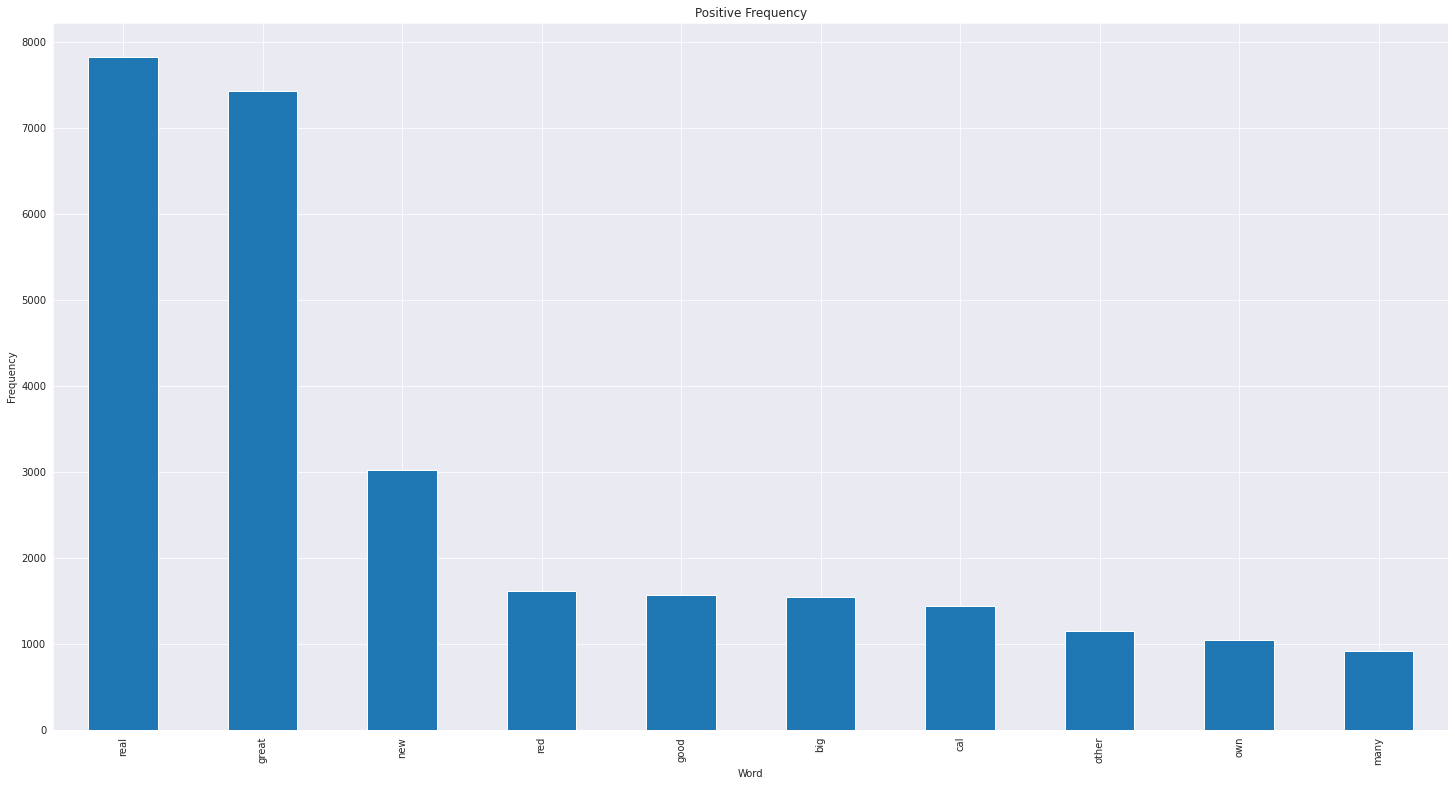

In [70]:
new_cols = adj.columns.copy()
new_cols = new_cols.to_list()
new_cols.remove('Positive')
new_cols.remove('Word')
adj_pos_10 = adj.sort_values(by=['Positive'], ascending=False).head(n=10).drop(columns=new_cols)
print(adj_pos_10)

labels = list(adj_pos_10['Word'])
ax = adj_pos_10.plot(kind='bar', figsize=(25, 13), title='Positive Frequency', legend=False, x='Word')
plt.ylabel('Frequency')

### Negative adjectives most frequent

      Word  Negative
23    real      2460
43     new      2043
856    cal      1402
40     red      1146
122    bad       989
90     low       983
73   other       961
13     own       771
20     big       729
50    many       677


Text(0, 0.5, 'Frequency')

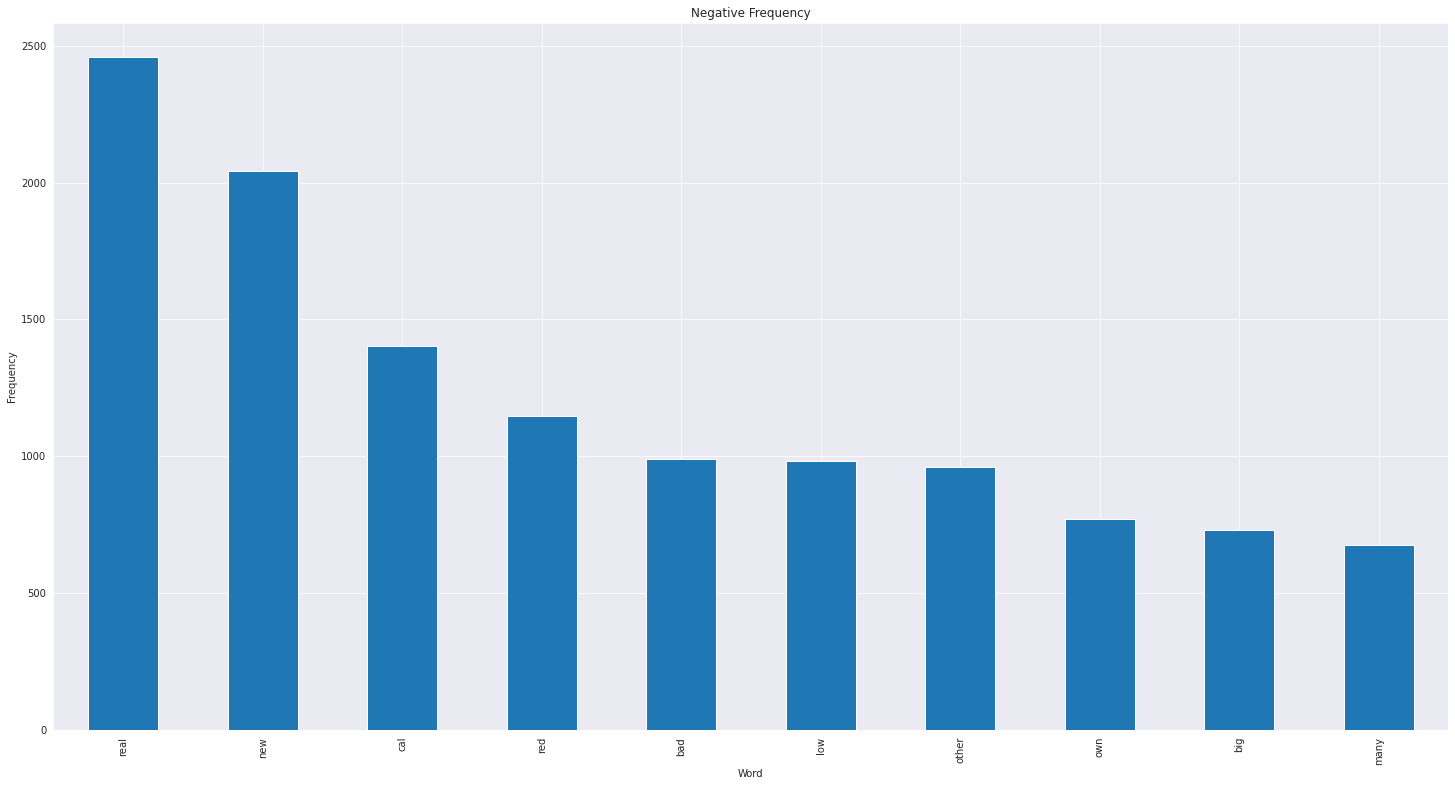

In [71]:
new_cols = adj.columns.copy()
new_cols = new_cols.to_list()
new_cols.remove('Negative')
new_cols.remove('Word')
adj_pos_10 = adj.sort_values(by=['Negative'], ascending=False).head(n=10).drop(columns=new_cols)
print(adj_pos_10)

labels = list(adj_pos_10['Word'])
ax = adj_pos_10.plot(kind='bar', figsize=(25, 13), title='Negative Frequency', legend=False, x='Word')
plt.ylabel('Frequency')


### Neutral adjectives most frequent

      Word  Neutral
23    real     2643
43     new     1094
856    cal      502
10   white      421
40     red      407
20     big      361
13     own      353
24    live      334
1    great      322
160    old      290


Text(0, 0.5, 'Frequency')

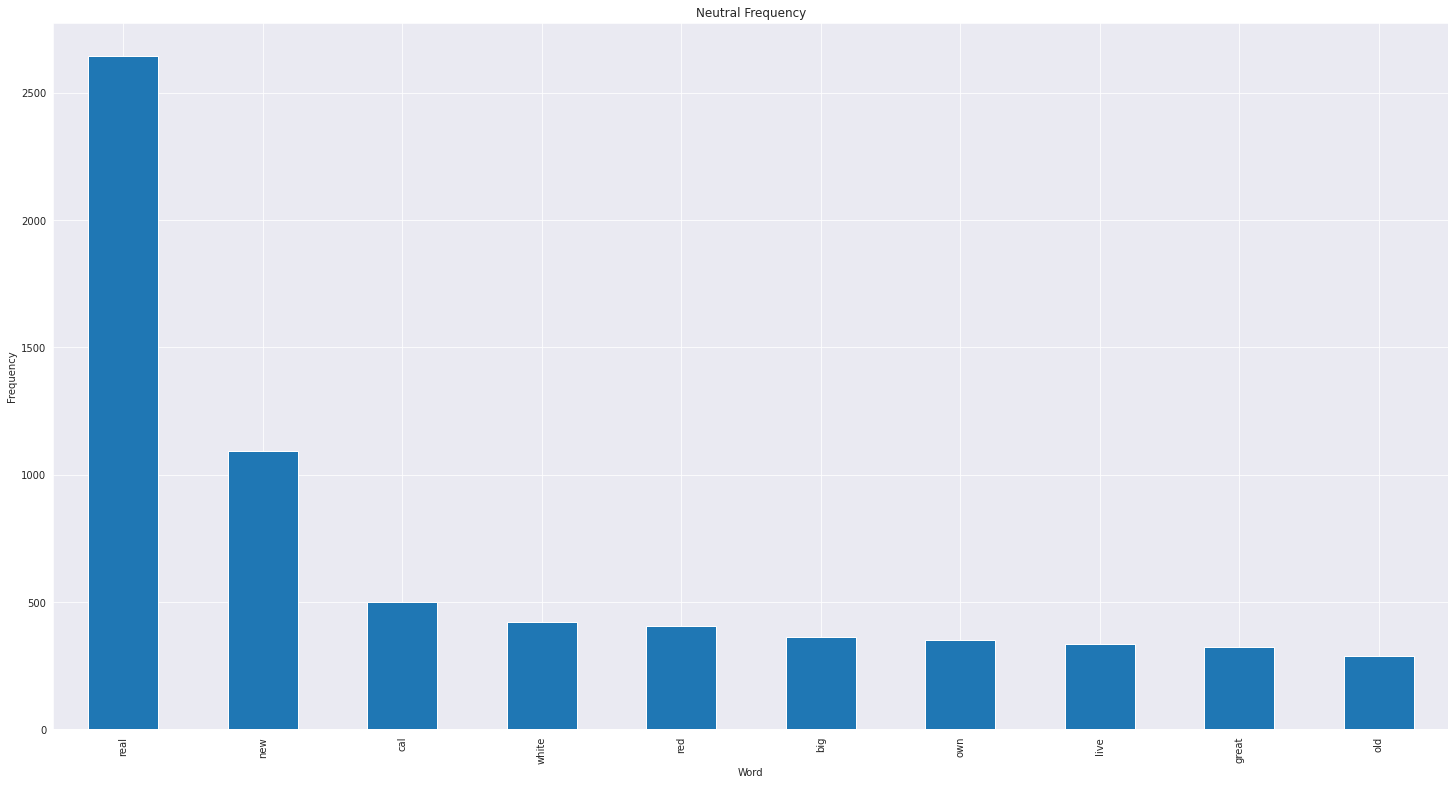

In [72]:
new_cols = adj.columns.copy()
new_cols = new_cols.to_list()
new_cols.remove('Neutral')
new_cols.remove('Word')
adj_pos_10 = adj.sort_values(by=['Neutral'], ascending=False).head(n=10).drop(columns=new_cols)
print(adj_pos_10)


labels = list(adj_pos_10['Word'])
ax = adj_pos_10.plot(kind='bar', figsize=(25, 13), title='Neutral Frequency', legend=False, x='Word')
plt.ylabel('Frequency')
